# Homework 6

## FINM 36700 - 2024

### UChicago Financial Mathematics


## 4 Estimating Underperformance

## 4.1

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


ticker = ["SPY", "VGK"]  
start_date = "2000-01-01"
end_date = "2024-10-31"
data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
data = data['Adj Close']

data = data.pct_change()

data.dropna(inplace=True)
data.head(5)

[*********************100%%**********************]  2 of 2 completed


,SPY,VGK
Date,,
2005-05-01,0.032225,0.002697
2005-06-01,-0.002510,0.013452
2005-07-01,0.042452,0.027568
2005-08-01,-0.009374,0.028418
2005-09-01,0.003752,0.013140


In [2]:
years = [(2005, 2015), (2016, 2024), (2005, 2024)]
summary = pd.DataFrame()
data["excess_return"] = data["SPY"] - data["VGK"]

for year in years:
    temp = data.loc[f"{year[0]}":f"{year[1]}"]
    annual_mean = temp.mean() * 12
    annual_std = temp.std() * np.sqrt(12)
    sharpe_ratio = (temp.mean() / temp.std()) * np.sqrt(12)

    # Create a DataFrame
    df = pd.DataFrame({
        'Annual Mean': annual_mean,
        'Annual Std': annual_std,
        'Sharpe Ratio': sharpe_ratio,
        'Period':  f"{year[0]} - {year[1]}"
    })
    summary = pd.concat([summary,df], axis=0)
summary.set_index([summary.index, 'Period'], inplace=True)

print("Simple returns - summary statistics")
display(summary.style.format("{:.2%}"))

Simple returns - summary statistics


,,Annual Mean,Annual Std,Sharpe Ratio
,Period,,,
SPY,2005 - 2015,8.44%,14.86%,56.78%
VGK,2005 - 2015,6.36%,20.35%,31.26%
excess_return,2005 - 2015,2.07%,10.37%,20.00%
SPY,2016 - 2024,14.70%,15.79%,93.09%
VGK,2016 - 2024,8.30%,18.02%,46.06%
excess_return,2016 - 2024,6.40%,9.49%,67.45%
SPY,2005 - 2024,11.27%,15.28%,73.77%
VGK,2005 - 2024,7.24%,19.29%,37.53%
excess_return,2005 - 2024,4.03%,9.98%,40.41%


*Comments* :

In the 2016–2024 period, both SPY and VGK show higher Sharpe Ratios compared to their respective full-sample values. SPY's Sharpe Ratio increases significantly to 93.09% from the full-sample value of 73.77%, reflecting much stronger risk-adjusted performance in this later period due to improved returns and relatively stable risk. Similarly, VGK's Sharpe Ratio rises to 46.06% compared to the full-sample value of 37.53%, indicating a notable improvement in its risk-adjusted returns during the more recent period, though the magnitude of improvement is less pronounced compared to SPY. These improvements suggest that both assets performed better on a risk-adjusted basis in the 2016–2024 timeframe than they did on average across the entire sample.

In [3]:
data = np.log(1 + data)
data["excess_return"] = data["SPY"] - data["VGK"]


In [4]:
years = [(2005, 2015), (2016, 2024), (2005, 2024)]
summary = pd.DataFrame()
for year in years:
    temp = data.loc[f"{year[0]}":f"{year[1]}"]
    annual_mean = temp.mean() * 12
    annual_std = temp.std() * np.sqrt(12)
    sharpe_ratio = (temp.mean() / temp.std()) * np.sqrt(12)

    # Create a DataFrame
    df = pd.DataFrame({
        'Annual Mean': annual_mean,
        'Annual Std': annual_std,
        'Sharpe Ratio': sharpe_ratio,
        'Period':  f"{year[0]} - {year[1]}"
    })
    summary = pd.concat([summary,df], axis=0)
summary.set_index([summary.index, 'Period'], inplace=True)


In [5]:
print("Logs returns - summary statistics")
display(summary.style.format("{:.2%}"))

Logs returns - summary statistics


,,Annual Mean,Annual Std,Sharpe Ratio
,Period,,,
SPY,2005 - 2015,7.30%,15.01%,48.65%
VGK,2005 - 2015,4.27%,20.58%,20.74%
excess_return,2005 - 2015,3.03%,10.35%,29.31%
SPY,2016 - 2024,13.38%,15.81%,84.64%
VGK,2016 - 2024,6.66%,18.08%,36.86%
excess_return,2016 - 2024,6.72%,9.39%,71.55%
SPY,2005 - 2024,10.06%,15.37%,65.43%
VGK,2005 - 2024,5.35%,19.45%,27.52%
excess_return,2005 - 2024,4.70%,9.92%,47.41%


*Comments :*

The behavior of the Sharpe Ratios remains consistent between simple and log returns, with higher Sharpe Ratios observed for SPY and VGK in the 2016–2024 period compared to the full sample. However, the slight differences in the metrics stem from the more **conservative nature of log returns**, which emphasize higher moments of the return distribution and provide a more nuanced view of compounding effects and risk. This adjustment slightly lowers the annual mean and alters the Sharpe Ratio calculations, but the overall trend of improved risk-adjusted performance in the later period remains unchanged. Log returns offer a refined perspective, especially when analyzing long-term performance or distributions with non-linear characteristics.

## 4.2

In [6]:
from scipy.stats import norm
h = np.arange(30) + 1


print("4.2 - Probability of SPX underperforming VGK in the next 15 and 30 years")
for year in years:
    mu = summary.loc[('excess_return', f"{year[0]} - {year[1]}"), "Annual Mean"]
    sigma = summary.loc[('excess_return', f"{year[0]} - {year[1]}"), "Annual Std"]
    print(f'SPX underperforming VGK in the next 15 years period {year[0]} - {year[1]}: {norm.cdf(0, mu, sigma/np.sqrt(15)):,.2%}')
    print(f'SPX underperforming VGK in the next 30 years period {year[0]} - {year[1]}: {norm.cdf(0, mu, sigma/np.sqrt(30)):,.2%}')




4.2 - Probability of SPX underperforming VGK in the next 15 and 30 years
SPX underperforming VGK in the next 15 years period 2005 - 2015: 12.82%
SPX underperforming VGK in the next 30 years period 2005 - 2015: 5.42%
SPX underperforming VGK in the next 15 years period 2016 - 2024: 0.28%
SPX underperforming VGK in the next 30 years period 2016 - 2024: 0.00%
SPX underperforming VGK in the next 15 years period 2005 - 2024: 3.32%
SPX underperforming VGK in the next 30 years period 2005 - 2024: 0.47%


## 4.3

4.3 - Probability of SPX underperforming VGK in the next 30 years


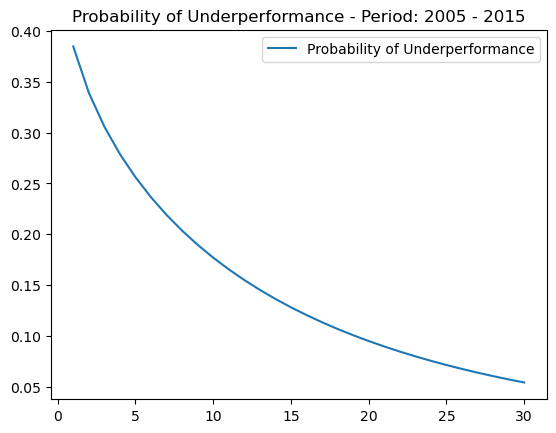

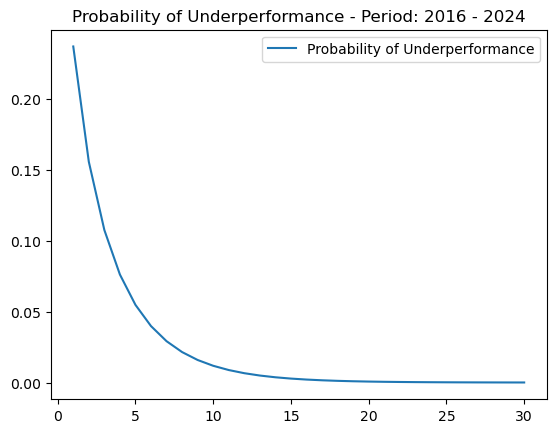

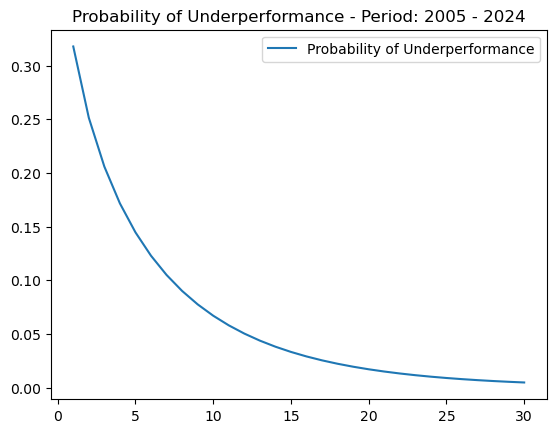

In [7]:
print("4.3 - Probability of SPX underperforming VGK in the next 30 years")
for year in years:
    mu = summary.loc[('excess_return', f"{year[0]} - {year[1]}"), "Annual Mean"]
    sigma = summary.loc[('excess_return', f"{year[0]} - {year[1]}"), "Annual Std"]    
    probs = pd.DataFrame([norm.cdf(0, mu, sigma/np.sqrt(x)) for x in h], columns=['Probability of Underperformance'],index = h)
    probs.plot(title=f"Probability of Underperformance - Period: {year[0]} - {year[1]}")

## 4.4

In [8]:
mu = summary.loc[('SPY','2005 - 2015'), "Annual Mean"] - summary.loc[('SPY','2016 - 2024'), "Annual Mean"]
sigma = summary.loc[('SPY','2005 - 2015'), "Annual Std"]

print(f"Probability of underperformance in 2016 - 2024: {norm.cdf(0, mu, sigma/np.sqrt(24)):,.2%}")

Probability of underperformance in 2016 - 2024: 97.64%
